# **Solar Radiation Prediction**

Solar radiation, often called the solar resource or just sunlight, is a general term for the electromagnetic radiation emitted by the sun. Solar radiation can be captured and turned into useful forms of energy, such as heat and electricity, using a variety of technologies. However, the technical feasibility and economical operation of these technologies at a specific location depends on the available solar resource.

In this project , we are going to predict the Solar Radiation released by the sun  , by considering the various factors and correlating them to create our models and eventually predict Solar Radiation

### Importing Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

#### Using Kaggle API Command to fetch Dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prodigiousphoton","key":"cea6c912a484a4ee07cf635547372b98"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dronio/SolarEnergy

  0% 0.00/511k [00:00<?, ?B/s]
100% 511k/511k [00:00<00:00, 16.4MB/s]


In [ ]:
!unzip /content/SolarEnergy.zip

Archive:  /content/SolarEnergy.zip
  inflating: SolarPrediction.csv     


#### Exploring the Dataset

In [ ]:
data = pd.read_csv('/content/SolarPrediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
data.shape

(32686, 11)

In [ ]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

#### No null values found , so we dont need to clean the data

In [ ]:
data.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [ ]:
train_data = data.iloc[:,3:9]
train_data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


In [ ]:
data['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


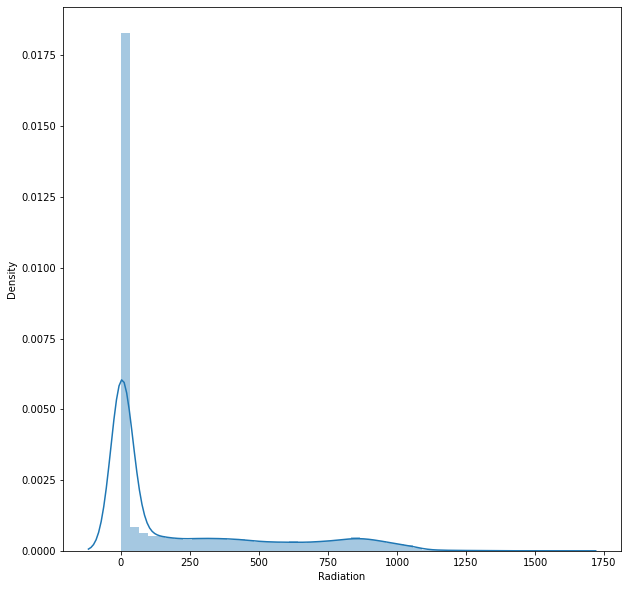

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data['Radiation'])
plt.show()

In [ ]:
data_corr = data.corr()
data_corr

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


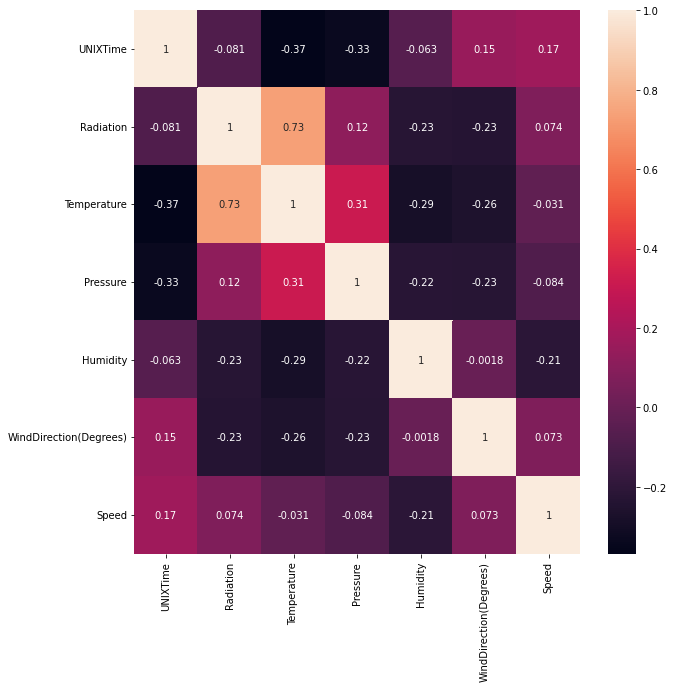

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True)
plt.show()

#### Modelling the Data

In [ ]:
x = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#### Linear Regression Model

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

#### Random Forest Regressor Model

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_pred= rf_reg.predict(x_test)

#### Ridge Regression Model

In [ ]:
rm = Ridge(alpha=1.0)
rm.fit(x_train, y_train)
rm_pred= rm.predict(x_test)

#### Model Scores

In [ ]:
print(r2_score(y_test, lr_pred))
print(r2_score(y_test, rf_pred))
print(r2_score(y_test, rm_pred))

0.5663130416232272
0.7475128963223212
0.5663067613817383


In [ ]:
rm_rmse=np.sqrt(mean_squared_error(y_test,rm_pred))
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))

In [ ]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Ridge Regression','Random Forest Regression'], 
                         'RMSE': [lr_rmse,rm_rmse, rf_rmse]})
model_ev

,Model,RMSE
0,Linear Regression,210.044098
1,Ridge Regression,210.045619
2,Random Forest Regression,160.266186


#### We can see that overall Random Forest Regression , gives out the lowest RMSE , of 160.266 in comparison to Ridge and Linear Regression RMSE scores.

### Conclusion : Hence , in this project we have used three Regression Models to predict the Solar Radiation Levels on our Dataset.We used Linear Regression , Random Forest Regressor and Ridge Regression Models.Out of these 3 Random Forest gave us the lowest RMSE , so we can further use Random Forest Model for better accuracy models , rather than other Regression Models.This model can help and understand the weather and solar radiation related effects and thus work on further predicting the occurences of the same.